In [3]:
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

df  = pd.read_csv('clean_horror.csv')
df

,ID,Title,Release Date,Popularity,Vote Average,Vote Count,Budget,Revenue,Runtime,Genres,Original Language,Production Companies,Production Countries,Overview,Tagline,Status,Director
0,17,The Dark,2005-09-28,9.063,5.768,263,0,6593579,87,"Horror, Thriller, Mystery",en,"Constantin Film, Impact Pictures, Isle of Man ...","Germany, United Kingdom","In an attempt to pull her family together, Adè...",One of the living for one of the dead.,Released,John Fawcett
1,83,Open Water,2003-10-26,11.331,5.530,1038,130000,54700000,79,"Drama, Thriller, Horror",en,"Plunge Pictures LLC, Lions Gate Films",United States of America,Two divers are left out at sea without a boat....,Scream all you want.,Released,Chris Kentis
2,170,28 Days Later,2002-10-31,45.982,7.227,6608,8000000,85700000,113,"Horror, Thriller, Science Fiction",en,DNA Films,United Kingdom,Twenty-eight days after a killer virus was acc...,His fear began when he woke up alone. His terr...,Released,Danny Boyle
3,176,Saw,2004-10-01,50.057,7.420,9087,1200000,103911669,103,"Horror, Mystery, Crime",en,"Twisted Pictures, Evolution Entertainment, Saw...",United States of America,Two men wake up to find themselves shackled in...,How much blood would you shed to stay alive?,Released,James Wan
4,214,Saw III,2006-10-26,49.447,6.403,4441,10000000,164876498,108,"Horror, Thriller, Crime",en,"Twisted Pictures, Evolution Entertainment, Lio...",United States of America,Jigsaw has disappeared. Along with his new app...,Suffering? You haven't seen anything yet...,Released,Darren Lynn Bousman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37060,1363600,O Assassino,2019-12-04,0.000,10.000,1,0,0,0,"Horror, Thriller, Crime",pt,NaN,Brazil,NaN,NaN,Released,Luis Eduardo de Souza
37061,1363688,Lucid dream,NaN,0.000,0.000,0,100,0,0,NaN,en,NaN,NaN,NaN,NaN,Released,NaN
37062,1363693,The Caricature,NaN,0.000,0.000,0,20,0,5,NaN,en,NaN,NaN,When a man's vehicle breaks down on a lonely r...,"Even in the darkest of nights, not is all as i...",Released,NaN
37063,1363710,The Caricature: Residuum,NaN,0.000,0.000,0,40,0,0,NaN,en,NaN,NaN,NaN,NaN,Released,NaN


C:\Users\Sahan\AppData\Local\Temp\ipykernel_11788\1292365149.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Director', y='Vote Average', data=vote_averages, palette='viridis')


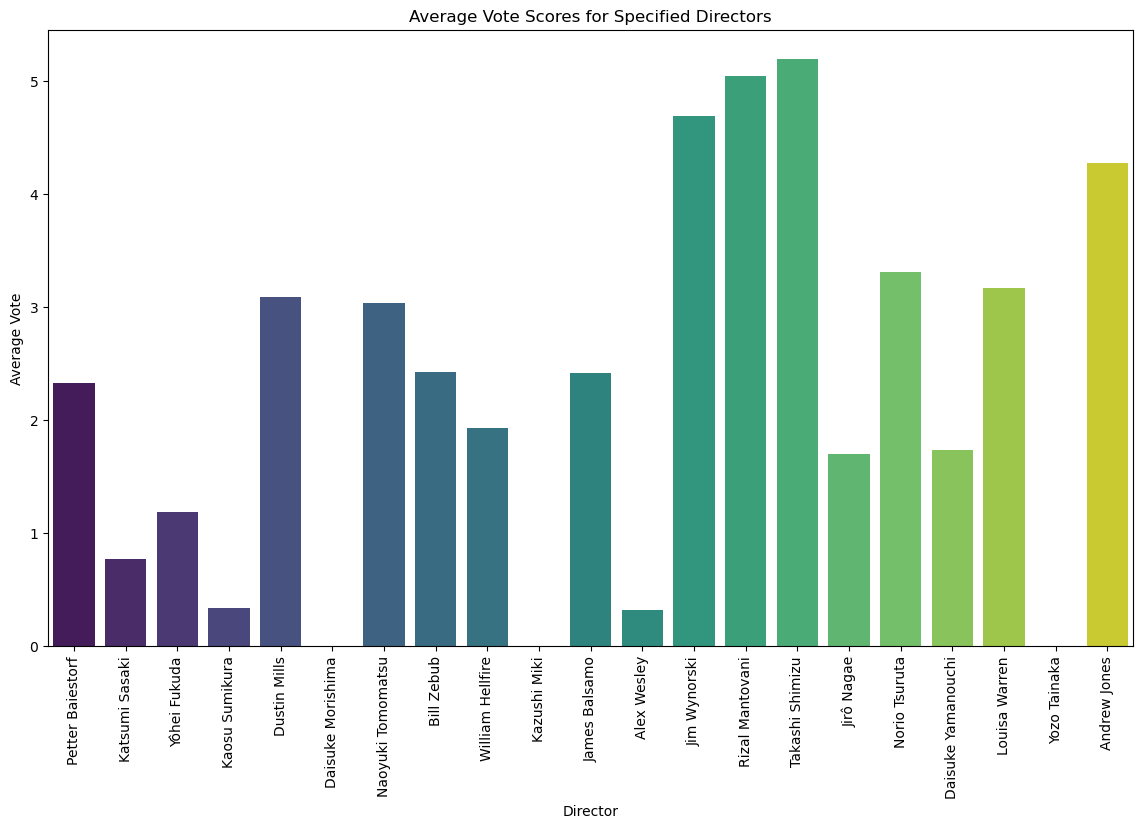

In [13]:
filtered_df = df[df['Vote Count'] >= 100]
average_vote = filtered_df.groupby('Director')['Vote Average'].mean().reset_index()
sorted_average_vote = average_vote.sort_values(by='Vote Average', ascending=False)
sorted_average_vote.head(20)

,Director,Vote Average
839,Marvick Núñez,8.37000
560,Javier Soto,8.14300
1051,Ricardo Arnaiz,8.02550
1173,Stan Winston,8.00000
674,Joseph Hemsani Levy,7.94900
460,Graeme Harper,7.88400
194,Casper Kelly,7.79400
33,Alberto Rodríguez,7.78625
369,Doug Murphy,7.70100
1177,Stefan Prehn,7.70100


In [14]:
filtered_df = df[(df['Vote Count'] >= 100) & (df['Production Countries'] == 'United States of America')]

# Group by 'Director' and calculate the mean 'Vote Average'
average_vote = filtered_df.groupby('Director')['Vote Average'].mean().reset_index()

# Sort the DataFrame by 'Vote Average' in descending order
sorted_average_vote = average_vote.sort_values(by='Vote Average', ascending=False)

print("DataFrame with average Vote Average by Director (with more than 100 votes and in 'United States of America'):")
sorted_average_vote

DataFrame with average Vote Average by Director (with more than 100 votes and in 'United States of America'):


,Director,Vote Average
578,Stan Winston,8.000
94,Casper Kelly,7.794
189,Doug Murphy,7.701
381,Kazumi Fukushima,7.664
204,Emma Tammi,7.568
...,...,...
475,Nick Everhart,3.322
121,Craig Moss,3.311
214,Farhad Mann,3.136
436,Meir Zarchi,3.025


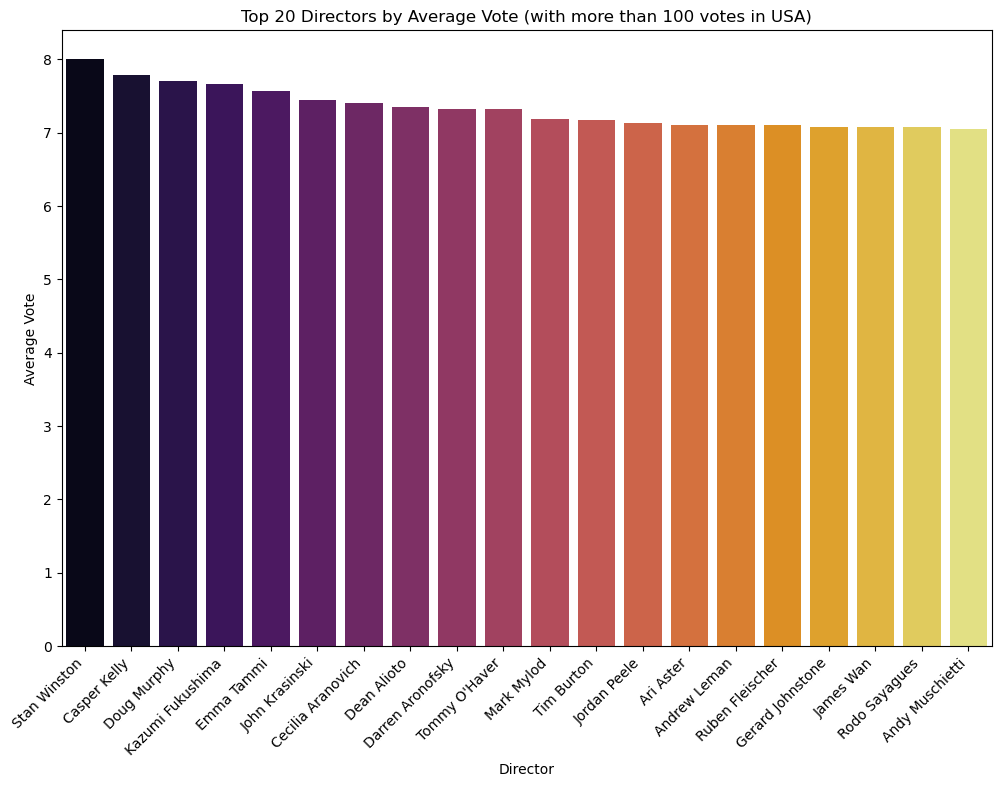

In [20]:
top_20_directors = sorted_average_vote.head(20)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Director', y='Vote Average', data=top_20_directors, palette='inferno', hue='Director', dodge=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Top 20 Directors by Average Vote (with more than 100 votes in USA)')
plt.xlabel('Director')
plt.ylabel('Average Vote')

# Show the plot
plt.show()

In [22]:
directors_with_3_entries = df.groupby('Director').filter(lambda x: len(x) >= 3)

production_countries_filter = ['United States of America', 'Canada', 'United States of America', 'United States of America', 'Canada', 'United States of America']
filtered_df = directors_with_3_entries[directors_with_3_entries['Production Countries'].isin(production_countries_filter)]

average_popularity = filtered_df.groupby('Director')['Popularity'].mean().reset_index()
average_popularity.rename(columns={'Popularity': 'Average Popularity Score'}, inplace=True)
average_popularity = average_popularity.sort_values(by='Average Popularity Score', ascending=False)

average_popularity

,Director,Average Popularity Score
1082,Tim Burton,1032.440000
807,Michael Sarnoski,240.677000
383,Fede Álvarez,233.863667
463,JD Allen,148.463333
727,M. Night Shyamalan,141.742333
...,...,...
374,Ericka Boussarhane,0.036000
158,Carlos Diaz,0.034000
726,Luke Thompson,0.031000
968,Ron DeCaro,0.003000


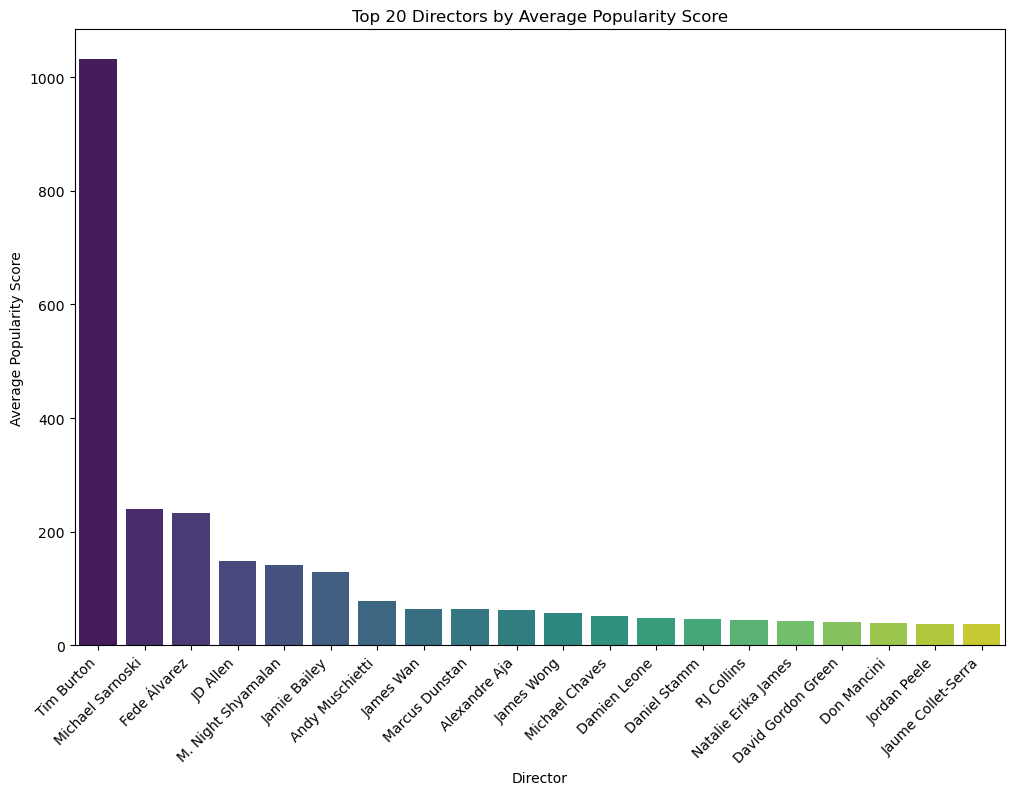

In [23]:
top_20_directors = average_popularity.head(20)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Director', y='Average Popularity Score', data=top_20_directors, palette='viridis', hue='Director', dodge=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Top 20 Directors by Average Popularity Score')
plt.xlabel('Director')
plt.ylabel('Average Popularity Score')

# Show the plot
plt.show()